In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
from sklearn.datasets import make_moons

x, label = make_moons(n_samples=1000, noise=0.12, random_state=19)
x=x*100

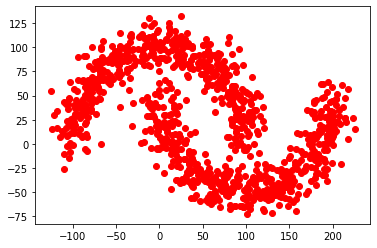

In [ ]:
plt.plot(x[:,0], x[:,1],'ro')


In [ ]:
points = { (point[0],point[1]):{'label':'undefined'} for point in x }


In [ ]:
def euclidean_distance(q, p):
    """
        Calculates the Euclidean distance
        between points P and Q
    """
    a = pow((q[0] - p[0]), 2)
    b = pow((q[1] - p[1]), 2)
    return pow((a + b), 0.5)

In [ ]:
def find_neighbors(db, q, eps):
    """
        Finds all points in the DB that
        are within a distance of eps from Q
    """
    return [p for p in db if euclidean_distance(q, p) <= eps]

In [ ]:
def plot_cluster(db, clusters):
    """
        Extracts all the points in the DB and puts them together
        as seperate clusters and finally plots them
    """
    temp = []
    noise = []
    for i in clusters:
        stack = []
        for k, v in db.items():
            if v["label"] == i:
                stack.append(k)
            elif v["label"] == "noise":
                noise.append(k)
        temp.append(stack)

    color = iter(plt.cm.rainbow(np.linspace(0, 1, len(clusters))))
    for i in range(0, len(temp)):
        c = next(color)
        x = [l[0] for l in temp[i]]
        y = [l[1] for l in temp[i]]
        plt.plot(x, y, "ro", c=c)

    x = [l[0] for l in noise]
    y = [l[1] for l in noise]
    plt.plot(x, y, "ro", c="0")

In [ ]:
def dbscan(db,eps,min_pts):
    '''
        Implementation of the DBSCAN algorithm
    '''
    clusters = []
    c = 0
    for p in db:
        if db[p]["label"] != "undefined":
            continue
        neighbors = find_neighbors(db, p, eps)
        if len(neighbors) < min_pts:
            db[p]["label"] = "noise"
            continue
        c += 1
        clusters.append(c)
        db[p]["label"] = c
        neighbors.remove(p)
        seed_set = neighbors.copy()
        while seed_set != []:
            q = seed_set.pop(0)
            if db[q]["label"] == "noise":
                db[q]["label"] = c
            if db[q]["label"] != "undefined":
                continue
            db[q]["label"] = c
            neighbors_n = find_neighbors(db, q, eps)
            if len(neighbors_n) >= min_pts:
                seed_set = seed_set + neighbors_n
    return db, clusters

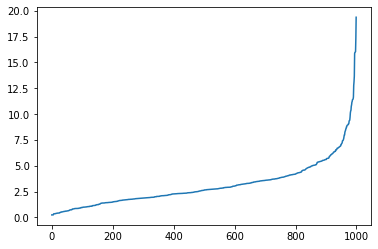

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

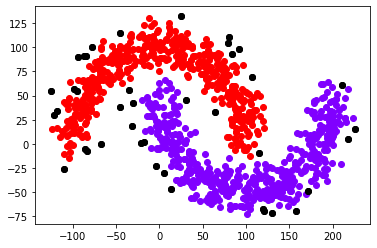

In [ ]:
eps = 10
min_pts = 4

db,clusters = dbscan(points,eps,min_pts)

plot_cluster(db,clusters)
